<a href="https://colab.research.google.com/github/Cado87/segmentation/blob/main/K-means_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


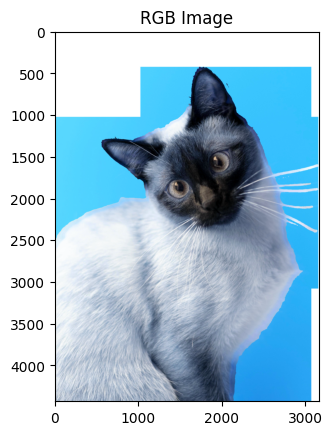

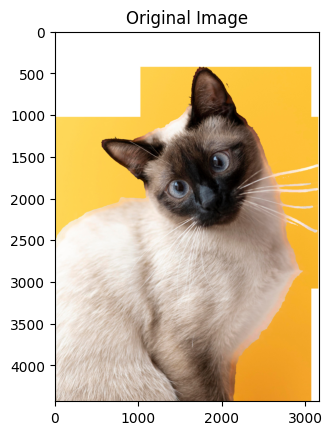

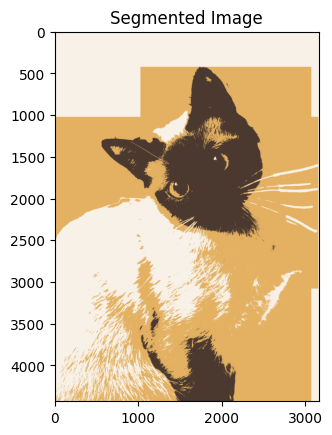

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

# Load image
image = cv2.imread('8623524.png')

#Visualize
plt.imshow(image)
plt.title('RGB Image')
plt.show()

# Convert to RGB (if necessary)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Flatten to 2D array
pixels = image.reshape(-1, 3).astype(np.float32)

# Define K-means parameters
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3

# Apply K-means
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Reshape labels to the size of the original image
labels = labels.reshape(image.shape[0], image.shape[1])

# Create k segments
segmented_image = np.zeros_like(image)
for i in range(k):
    segmented_image[labels == i] = centers[i]

# Display segments
plt.figure()
plt.imshow(image)
plt.title('Original Image')
plt.show()

plt.figure()
plt.imshow(segmented_image)
plt.title('Segmented Image')
plt.show()